# Agregación de datos por categoría

In [3]:
import pandas as pd
import numpy as np

In [4]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [5]:
n = 500

gender_data = []
income_data = []

for i in range(0, 500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [6]:
# Z -> N(0, 1)
# N(m, s) -> m + s * z

height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.randn(n)

In [7]:
data = pd.DataFrame(
    {
        "Gender": gender_data,
        "Economic Status": income_data,
        "Height": height,
        "Height": weight,
        "Age": age,
        "Income": income
    }
)

In [8]:
data.head(10)

,Gender,Economic Status,Height,Age,Income
0,Female,Poor,49.527278,37.793333,20431.551003
1,Female,Rich,22.340759,38.646274,14514.262893
2,Female,Rich,86.223924,28.004785,22278.597871
3,Male,Rich,67.107455,32.208059,24217.879368
4,Male,Middle Class,42.697664,31.932755,15400.441744
5,Male,Poor,84.376755,40.471468,11383.022491
6,Male,Poor,77.253812,37.457222,24213.371380
7,Female,Middle Class,69.448671,-1.484832,12521.218820
8,Female,Poor,58.855110,30.005920,14744.768094
9,Female,Rich,62.503767,30.971454,15696.760009


## Agrupación de datos

In [9]:
double_group = data.groupby(["Gender", "Economic Status"])

In [10]:
len(double_group)

6

In [11]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height        Age        Income
7    Female    Middle Class   69.448671  -1.484832  12521.218820
15   Female    Middle Class   52.147027  27.799839  17784.326011
26   Female    Middle Class   64.727274  24.417819  19398.777607
40   Female    Middle Class  105.547342  28.092512  24719.751275
42   Female    Middle Class   43.952276  48.794311  14624.919771
..      ...             ...         ...        ...           ...
476  Female    Middle Class   80.901434  40.081023  13008.548426
478  Female    Middle Class   72.505479  48.039470  18284.726189
482  Female    Middle Class   77.897553  21.645198  16842.955639
483  Female    Middle Class   64.636198  23.685798  18565.754015
494  Female    Middle Class   73.196829  23.974540  13652.375731

[82 rows x 5 columns]
('Female', 'Poor')
     Gender Economic Status     Height        Age        Income
0    Female            Poor  49.527278  37.793333  20431.551003
8    Female            

## Operaciones sobre datos agrupados

In [12]:
double_group.sum()

Height          Age        Income
Gender Economic Status                                        
Female Middle Class     5385.530805  2576.547335  1.437129e+06
       Poor             6144.259303  2879.020308  1.759356e+06
       Rich             4636.482569  2449.276960  1.394765e+06
Male   Middle Class     5639.057107  2498.002510  1.443041e+06
       Poor             4791.287437  2187.187122  1.439570e+06
       Rich             5878.936105  2394.398287  1.543833e+06

In [13]:
double_group.mean()

Height        Age        Income
Gender Economic Status                                    
Female Middle Class     65.677205  31.421309  17525.958772
       Poor             62.696523  29.377758  17952.611052
       Rich             59.442084  31.400987  17881.607682
Male   Middle Class     67.940447  30.096416  17386.038819
       Poor             62.224512  28.405028  18695.712180
       Rich             71.694343  29.199979  18827.230260

In [14]:
double_group.size()

Gender  Economic Status
Female  Middle Class       82
        Poor               98
        Rich               78
Male    Middle Class       83
        Poor               77
        Rich               82
dtype: int64

In [15]:
double_group.describe()

Height                                              \
                        count       mean        std        min        25%   
Gender Economic Status                                                      
Female Middle Class      82.0  65.677205  21.301176  13.273881  51.378517   
       Poor              98.0  62.696523  24.348643  -6.344046  47.456631   
       Rich              78.0  59.442084  23.685796   5.368872  38.677686   
Male   Middle Class      83.0  67.940447  24.780180   6.418252  47.538706   
       Poor              77.0  62.224512  25.959153   9.774855  45.170742   
       Rich              82.0  71.694343  23.072896  21.472826  54.852531   

                                                           Age             \
                              50%        75%         max count       mean   
Gender Economic Status                                                      
Female Middle Class     67.820065  80.471993  108.453246  82.0  31.421309   
       Poor             60.354964  78.467566  118.552099  98.0  29.377758   
       Rich             62.551779  75.595206  119.621464  78.0  31.400987   
Male   Middle Class     70.435071  85.387269  129.548357  83.0  30.096416   
       Poor             58.007232  81.230762  141.967147  77.0  28.405028   
       Rich             70.200103  87.620925  116.647362  82.0  29.199979   

                        ...                       Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  40.046812  61.977182   82.0  17525.958772   
       Poor             ...  35.551869  58.426323   98.0  17952.611052   
       Rich             ...  39.061231  72.986254   78.0  17881.607682   
Male   Middle Class     ...  37.881805  54.437924   83.0  17386.038819   
       Poor             ...  36.707315  60.613040   77.0  18695.712180   
       Rich             ...  36.333222  56.121596   82.0  18827.230260   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class     3374.896473   8479.774290  15199.646130  17937.931997   
       Poor             3620.001493   9254.481652  15357.160260  18127.231059   
       Rich             3407.430347   7981.677772  15482.750851  17824.447753   
Male   Middle Class     3519.496879   9119.170307  14997.724377  17128.386378   
       Poor             3625.130264  11298.703171  15886.710971  18506.081797   
       Rich             3714.218934  11487.101962  16044.633068  18959.962376   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     19280.666938  27837.933111  
       Poor             20390.222862  27037.810898  
       Rich             19993.328343  27379.173342  
Male   Middle Class     19592.326719  26983.318669  
       Poor             21451.568566  26444.197512  
       Rich             21565.709162  26835.776191  

[6 rows x 24 columns]

In [16]:
grouped_income = double_group["Income"]

grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      82.0  17525.958772  3374.896473   8479.774290   
       Poor              98.0  17952.611052  3620.001493   9254.481652   
       Rich              78.0  17881.607682  3407.430347   7981.677772   
Male   Middle Class      83.0  17386.038819  3519.496879   9119.170307   
       Poor              77.0  18695.712180  3625.130264  11298.703171   
       Rich              82.0  18827.230260  3714.218934  11487.101962   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     15199.646130  17937.931997  19280.666938  27837.933111  
       Poor             15357.160260  18127.231059  20390.222862  27037.810898  
       Rich             15482.750851  17824.447753  19993.328343  27379.173342  
Male   Middle Class     14997.724377  17128.386378  19592.326719  26983.318669  
       Poor             15886.710971  18506.081797  21451.568566  26444.197512  
       Rich             16044.633068  18959.962376  21565.709162  26835.776191

In [19]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age": np.mean,
        "Height": np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.437129e+06  31.421309  21.301176
       Poor             1.759356e+06  29.377758  24.348643
       Rich             1.394765e+06  31.400987  23.685796
Male   Middle Class     1.443041e+06  30.096416  24.780180
       Poor             1.439570e+06  28.405028  25.959153
       Rich             1.543833e+06  29.199979  23.072896

In [20]:
double_group.aggregate(
    {
        "Age": np.mean,
        "Height": lambda h: np.mean(h)/np.std(h),
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     31.421309  3.102241
       Poor             29.377758  2.588188
       Rich             31.400987  2.525852
Male   Middle Class     30.096416  2.758392
       Poor             28.405028  2.412735
       Rich             29.199979  3.126419

In [23]:
double_group.aggregate([np.sum, np.mean])

Height                     Age             \
                                sum       mean          sum       mean   
Gender Economic Status                                                   
Female Middle Class     5385.530805  65.677205  2576.547335  31.421309   
       Poor             6144.259303  62.696523  2879.020308  29.377758   
       Rich             4636.482569  59.442084  2449.276960  31.400987   
Male   Middle Class     5639.057107  67.940447  2498.002510  30.096416   
       Poor             4791.287437  62.224512  2187.187122  28.405028   
       Rich             5878.936105  71.694343  2394.398287  29.199979   

                              Income                
                                 sum          mean  
Gender Economic Status                              
Female Middle Class     1.437129e+06  17525.958772  
       Poor             1.759356e+06  17952.611052  
       Rich             1.394765e+06  17881.607682  
Male   Middle Class     1.443041e+06  17386.038819  
       Poor             1.439570e+06  18695.712180  
       Rich             1.543833e+06  18827.230260

## Filtrado de datos

In [29]:
double_group["Age"].filter(lambda x: x.sum() > 2400)

0      37.793333
1      38.646274
2      28.004785
4      31.932755
7      -1.484832
         ...    
494    23.974540
495    22.298742
496    40.289535
498    21.619458
499     7.299765
Name: Age, Length: 341, dtype: float64

## Trasformación de variables

In [35]:
zscore = lambda x: ( x - x.mean() ) / x.std()

z_group = double_group.transform(zscore)

In [37]:
import matplotlib.pyplot as plt

(array([  1.,   8.,  25.,  77., 109., 128., 104.,  34.,  11.,   3.]),
 array([-3.50141134, -2.82488037, -2.14834939, -1.47181842, -0.79528744,
        -0.11875647,  0.55777451,  1.23430548,  1.91083646,  2.58736744,
         3.26389841]),
 <BarContainer object of 10 artists>)

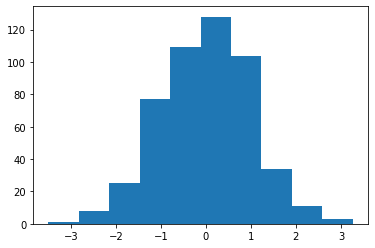

In [38]:
plt.hist(z_group["Age"])

In [39]:
fill_na_mean = lambda x: x.fillna(x.mean())

double_group.transform(fill_na_mean)

,Height,Age,Income
0,49.527278,37.793333,20431.551003
1,22.340759,38.646274,14514.262893
2,86.223924,28.004785,22278.597871
3,67.107455,32.208059,24217.879368
4,42.697664,31.932755,15400.441744
...,...,...,...
495,41.623510,22.298742,16909.501414
496,99.638427,40.289535,24960.379558
497,62.993777,15.283793,17794.765964
498,58.867400,21.619458,20595.286157


## Operaciones diversas muy útiles

In [41]:
double_group.head(1)

,Gender,Economic Status,Height,Age,Income
0,Female,Poor,49.527278,37.793333,20431.551003
1,Female,Rich,22.340759,38.646274,14514.262893
3,Male,Rich,67.107455,32.208059,24217.879368
4,Male,Middle Class,42.697664,31.932755,15400.441744
5,Male,Poor,84.376755,40.471468,11383.022491
7,Female,Middle Class,69.448671,-1.484832,12521.218820


In [43]:
double_group.nth(32)

Height        Age        Income
Gender Economic Status                                     
Female Middle Class     103.988201  53.857982  27837.933111
       Poor              69.813010  18.422671  20968.745754
       Rich              59.026375  38.379186  18753.131178
Male   Middle Class      92.054937  39.327129  13994.458988
       Poor              78.298139  23.322847  23801.397359
       Rich              68.451400  32.819953  18377.619947

In [44]:
data_sorted = data.sort_values(["Age", "Income"])

In [45]:
data_sorted.head(10)

,Gender,Economic Status,Height,Age,Income
30,Female,Rich,84.633610,-13.210429,16602.892642
289,Female,Middle Class,64.068846,-3.077884,9773.684255
7,Female,Middle Class,69.448671,-1.484832,12521.218820
58,Male,Rich,59.296259,-1.357453,18205.515162
130,Female,Middle Class,53.329666,-0.235037,22056.223877
333,Female,Rich,40.079063,2.296878,17618.068648
373,Female,Middle Class,26.706909,2.591396,16410.231296
18,Male,Middle Class,48.186909,2.874732,17835.479301
327,Male,Middle Class,71.638488,3.189308,15761.991440
467,Male,Poor,26.831201,5.630978,13140.514690


In [46]:
age_grouped = data_sorted.groupby("Gender")

In [50]:
age_grouped.head(1)

,Gender,Economic Status,Height,Age,Income
30,Female,Rich,84.633610,-13.210429,16602.892642
58,Male,Rich,59.296259,-1.357453,18205.515162


In [51]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Age,Income
311,Male,Poor,65.640434,60.613040,20633.037125
59,Female,Rich,35.491531,72.986254,20727.843146


## Conjunto de entrenamiento y conjunto de testing

In [67]:
dataset_path = '../../data/python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt'
data = pd.read_csv(dataset_path)

In [72]:
len(data)

3333

## Dividir utilizando la distribución normal

In [73]:
a = np.random.randn(len(data))

(array([  1.,  22., 129., 393., 736., 934., 684., 318., 101.,  15.]),
 array([-3.84955736, -3.13781165, -2.42606594, -1.71432023, -1.00257452,
        -0.29082882,  0.42091689,  1.1326626 ,  1.84440831,  2.55615402,
         3.26789973]),
 <BarContainer object of 10 artists>)

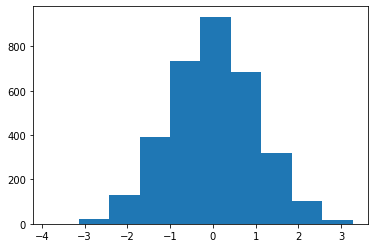

In [74]:
plt.hist(a)

In [75]:
check = (a < 0.8)

In [76]:
check

array([ True,  True, False, ..., False,  True,  True])

(array([ 685.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2648.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

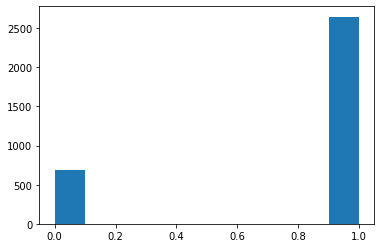

In [78]:
plt.hist(check.astype(int))

In [80]:
training = data[check]
testing = data[~check]

In [88]:
len(training)

2648

In [87]:
len(testing)

685

## Con la libreria sklearn

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
train, test = train_test_split(data, test_size=0.2)

In [92]:
len(training)

2648

In [93]:
len(testing)

685

## Usando una función shuffle

In [96]:
import numpy as np
import sklearn

In [99]:
data = sklearn.utils.shuffle(data)

In [101]:
cut_ud = int(0.75 * len(data))
train_data = data[:cut_ud]
test_data = data[cut_ud+1:]

In [102]:
len(train_data)

2499

In [103]:
len(test_data)

833